In [9]:
import os
import math
from obspy import UTCDateTime
import numpy as np

def compare_locations(fname1,fname2):
    doc = open(fname1,'r')
    srcrec1 = doc.readlines()
    doc.close()

    doc = open(fname2,'r')
    srcrec2 = doc.readlines()
    doc.close()

    if(not len(srcrec1) == len(srcrec2)):
        print("input srec rec files are not consistent")
        return 

    error_ortime    = []
    error_lat       = []
    error_lon       = []
    error_dep       = []

    cc = 0
    for iline in range(len(srcrec1)):
        if (cc == 0):   # event line
            tmp = srcrec1[iline].split()
            year    = int(tmp[1])
            month   = int(tmp[2])
            day     = int(tmp[3])
            hour    = int(tmp[4])
            minute  = int(tmp[5])
            second  = float(tmp[6])
            ortime1 = UTCDateTime(year,month,day,hour,minute,0) + second

            lat1    = float(tmp[7])/180*math.pi*6371
            lon1    = float(tmp[8])/180*math.pi*6371 * math.cos(lat1/180*math.pi)
            dep1    = float(tmp[9])

            tmp = srcrec2[iline].split()
            year    = int(tmp[1])
            month   = int(tmp[2])
            day     = int(tmp[3])
            hour    = int(tmp[4])
            minute  = int(tmp[5])
            second  = float(tmp[6])
            ortime2 = UTCDateTime(year,month,day,hour,minute,0) + second

            lat2    = float(tmp[7])/180*math.pi*6371
            lon2    = float(tmp[8])/180*math.pi*6371 * math.cos(lat1/180*math.pi)
            dep2    = float(tmp[9])

            error_ortime.append(ortime1 - ortime2)
            error_lat.append(lat1 - lat2)
            error_lon.append(lon1 - lon2)
            error_dep.append(dep1 - dep2)

            ndata   = int(tmp[11])

            cc += 1
        else:   # data line
            if (cc == ndata):
                cc = 0
            else:
                cc += 1

    return (np.array(error_ortime),np.array(error_lat),np.array(error_lon),np.array(error_dep))




In [10]:
import os
import math
from obspy import UTCDateTime
import numpy as np

def get_location_ortime(fname1):
    doc = open(fname1,'r')
    srcrec1 = doc.readlines()
    doc.close()

    list_ortime    = []
    list_lat       = []
    list_lon       = []
    list_dep       = []

    cc = 0
    for iline in range(len(srcrec1)):
        if (cc == 0):   # event line
            tmp = srcrec1[iline].split()
            year    = int(tmp[1])
            month   = int(tmp[2])
            day     = int(tmp[3])
            hour    = int(tmp[4])
            minute  = int(tmp[5])
            second  = float(tmp[6])
            ortime1 = UTCDateTime(year,month,day,hour,minute,0) + second

            lat1    = float(tmp[7])
            lon1    = float(tmp[8])
            dep1    = float(tmp[9])

            list_ortime.append(ortime1)
            list_lat.append(lat1)
            list_lon.append(lon1)
            list_dep.append(dep1)

            ndata   = int(tmp[11])

            cc += 1
        else:   # data line
            if (cc == ndata):
                cc = 0
            else:
                cc += 1

    return (list_ortime,list_lat,list_lon,list_dep)




In [11]:
fname1 = "OUTPUT_FILES/OUTPUT_FILES_signal/src_rec_file_forward.dat"
fname2 = "src_rec_obs.dat"
error_ortime,error_lat,error_lon,error_dep = compare_locations(fname1,fname2)

print("%d earthquakes, the initial location errors are"%(len(error_ortime)))
print("The location error of ortime (s) are, max value: %.5g s, mean value: %.5g s, standard deviation: %.5g s."%(max(abs(error_ortime)), abs(error_ortime).mean(), abs(error_ortime).std()))
print("The location error of lat (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lat)), abs(error_lat).mean(), abs(error_lat).std()))
print("The location error of lon (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lon)), abs(error_lon).mean(), abs(error_lon).std()))
print("The location error of dep (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_dep)), abs(error_dep).mean(), abs(error_dep).std()))
print("")

100 earthquakes, the initial location errors are
The location error of ortime (s) are, max value: 1.5 s, mean value: 0.7752 s, standard deviation: 0.44056 s.
The location error of lat (km)   are, max value: 21.894 km, mean value: 10.905 km, standard deviation: 6.2229 km.
The location error of lon (km)   are, max value: 21.272 km, mean value: 7.7282 km, standard deviation: 6.1017 km.
The location error of dep (km)   are, max value: 4.961 km, mean value: 2.562 km, standard deviation: 1.4173 km.



In [12]:
fname1 = "OUTPUT_FILES/OUTPUT_FILES_signal/src_rec_file_forward.dat"
fname2 = "OUTPUT_FILES/OUTPUT_FILES_reloc_abs/src_rec_file_reloc_obs.dat"
error_ortime,error_lat,error_lon,error_dep = compare_locations(fname1,fname2)

print("%d earthquakes are located using absolute traveltime data"%(len(error_ortime)))
print("The location error of ortime (s) are, max value: %.5g s, mean value: %.5g s, standard deviation: %.5g s."%(max(abs(error_ortime)), abs(error_ortime).mean(), abs(error_ortime).std()))
print("The location error of lat (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lat)), abs(error_lat).mean(), abs(error_lat).std()))
print("The location error of lon (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lon)), abs(error_lon).mean(), abs(error_lon).std()))
print("The location error of dep (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_dep)), abs(error_dep).mean(), abs(error_dep).std()))
print("")

100 earthquakes are located using absolute traveltime data
The location error of ortime (s) are, max value: 0.04 s, mean value: 0.0009 s, standard deviation: 0.0047106 s.
The location error of lat (km)   are, max value: 0.12231 km, mean value: 0.0047814 km, standard deviation: 0.019018 km.
The location error of lon (km)   are, max value: 0.14766 km, mean value: 0.0037811 km, standard deviation: 0.017919 km.
The location error of dep (km)   are, max value: 0.1661 km, mean value: 0.003973 km, standard deviation: 0.016721 km.



In [13]:
fname1 = "OUTPUT_FILES/OUTPUT_FILES_signal/src_rec_file_forward.dat"
fname2 = "OUTPUT_FILES/OUTPUT_FILES_reloc_cr/src_rec_file_reloc_obs.dat"
error_ortime,error_lat,error_lon,error_dep = compare_locations(fname1,fname2)

print("%d earthquakes are located using common receiver differential traveltime data"%(len(error_ortime)))
print("The location error of ortime (s) are, max value: %.5g s, mean value: %.5g s, standard deviation: %.5g s."%(max(abs(error_ortime)), abs(error_ortime).mean(), abs(error_ortime).std()))
print("The location error of lat (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lat)), abs(error_lat).mean(), abs(error_lat).std()))
print("The location error of lon (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lon)), abs(error_lon).mean(), abs(error_lon).std()))
print("The location error of dep (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_dep)), abs(error_dep).mean(), abs(error_dep).std()))
print("")

100 earthquakes are located using common receiver differential traveltime data
The location error of ortime (s) are, max value: 0.34 s, mean value: 0.0747 s, standard deviation: 0.060505 s.
The location error of lat (km)   are, max value: 3.1802 km, mean value: 0.34537 km, standard deviation: 0.47472 km.
The location error of lon (km)   are, max value: 1.1988 km, mean value: 0.21254 km, standard deviation: 0.25627 km.
The location error of dep (km)   are, max value: 2.889 km, mean value: 0.40379 km, standard deviation: 0.46606 km.



In [14]:
fname1 = "OUTPUT_FILES/OUTPUT_FILES_signal/src_rec_file_forward.dat"
fname2 = "OUTPUT_FILES/OUTPUT_FILES_reloc_abs_cr/src_rec_file_reloc_init.dat"
error_ortime,error_lat,error_lon,error_dep = compare_locations(fname1,fname2)

print("%d earthquakes are located using both data"%(len(error_ortime)))
print("The location error of ortime (s) are, max value: %.5g s, mean value: %.5g s, standard deviation: %.5g s."%(max(abs(error_ortime)), abs(error_ortime).mean(), abs(error_ortime).std()))
print("The location error of lat (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lat)), abs(error_lat).mean(), abs(error_lat).std()))
print("The location error of lon (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_lon)), abs(error_lon).mean(), abs(error_lon).std()))
print("The location error of dep (km)   are, max value: %.5g km, mean value: %.5g km, standard deviation: %.5g km."%(max(abs(error_dep)), abs(error_dep).mean(), abs(error_dep).std()))
print("")

100 earthquakes are located using both data
The location error of ortime (s) are, max value: 0.11 s, mean value: 0.0042 s, standard deviation: 0.013355 s.
The location error of lat (km)   are, max value: 0.98963 km, mean value: 0.054486 km, standard deviation: 0.11114 km.
The location error of lon (km)   are, max value: 0.31424 km, mean value: 0.036969 km, standard deviation: 0.052224 km.
The location error of dep (km)   are, max value: 0.9037 km, mean value: 0.046054 km, standard deviation: 0.095867 km.



In [51]:
(ortime_init,lat_init,lon_init,dep_init) = get_location_ortime("src_rec_obs.dat")
(ortime_real,lat_real,lon_real,dep_real) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_signal/src_rec_file_forward.dat")
(ortime_cr,lat_cr,lon_cr,dep_cr) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_cr/src_rec_file_reloc_obs.dat")
(ortime_abs,lat_abs,lon_abs,dep_abs) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_abs/src_rec_file_reloc_obs.dat")
(ortime_abs_cr,lat_abs_cr,lon_abs_cr,dep_abs_cr) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_abs_cr/src_rec_file_reloc_obs.dat")

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

def plot_location_error(fname,output):

    (ortime_abs,lat_abs,lon_abs,dep_abs) = get_location_ortime(fname)

    fig = plt.figure(figsize=(24,24))
    gridspace = GridSpec(12,12,figure = fig)


    ax1 = fig.add_subplot(gridspace[0:6, 0:6])

    for i in range(len(lon_init)):
        ax1.plot([lon_abs[i],lon_init[i]],[lat_abs[i],lat_init[i]],'r--',linewidth=1)

    ax1.scatter(lon_real,lat_real,marker="*",color = "red", label = "real",s=2000)
    ax1.scatter(lon_abs,lat_abs,marker="*",color = "blue", label = "abs inv",s=500)
    ax1.scatter(lon_init,lat_init,marker="*",color = "black", label = "init",s=200,)

    ax1.legend(fontsize = 14)
    ax1.tick_params(axis='x',labelsize=18)
    ax1.tick_params(axis='y',labelsize=18)
    ax1.set_xlabel('Longitude',fontsize=18)
    ax1.set_ylabel('Latitude',fontsize=18)
    ax1.set_xlim((30,32))
    ax1.set_ylim((30,32))


    ax2 = fig.add_subplot(gridspace[0:6, 7:11])

    for i in range(len(dep_init)):
        ax2.plot([dep_abs[i],dep_init[i]],[lat_abs[i],lat_init[i]],'r--',linewidth=1)

    ax2.scatter(dep_real,lat_real,marker="*",color = "red", label = "real",s=2000)
    ax2.scatter(dep_abs,lat_abs,marker="*",color = "blue", label = "abs inv",s=500)
    ax2.scatter(dep_init,lat_init,marker="*",color = "black", label = "init",s=200,)

    # ax2.legend(fontsize = 14)
    ax2.tick_params(axis='x',labelsize=18)
    ax2.tick_params(axis='y',labelsize=18)
    ax2.set_xlabel('Depth (km)',fontsize=18)
    ax2.set_ylabel('Latitude',fontsize=18)
    ax2.set_xlim((0,40))
    ax2.set_ylim((30,32))


    ax3 = fig.add_subplot(gridspace[7:11, 0:6])

    for i in range(len(dep_init)):
        ax3.plot([lon_abs[i],lon_init[i]],[dep_abs[i],dep_init[i]],'r--',linewidth=1)

    ax3.scatter(lon_real,dep_real,marker="*",color = "red", label = "real",s=2000)
    ax3.scatter(lon_abs,dep_abs,marker="*",color = "blue", label = "abs inv",s=500)
    ax3.scatter(lon_init,dep_init,marker="*",color = "black", label = "init",s=200,)

    # ax3.legend(fontsize = 14)
    ax3.tick_params(axis='x',labelsize=18)
    ax3.tick_params(axis='y',labelsize=18)
    ax3.set_xlabel('Latitude',fontsize=18)
    ax3.set_ylabel('Depth (km)',fontsize=18)
    ax3.set_xlim((30,32))
    ax3.set_ylim((-2,40))
    ax3.invert_yaxis()


    ax4 = fig.add_subplot(gridspace[7:11, 7:11])
    # for i in range(len(dep_init)):
    #     ax4.plot([i,i],[ortime_abs[i]-ortime_real[i],ortime_init[i]-ortime_real[i]],'r--',linewidth=1)

    # ax4.scatter(lon_real,dep_real,marker="*",color = "red", label = "real",s=2000)
    index = []
    ortime_shift_abs = []
    ortime_shift_init = []
    for i in range(len(ortime_abs)):
        ortime_shift_abs.append(ortime_abs[i]-ortime_real[i])
        ortime_shift_init.append(ortime_init[i]-ortime_real[i])
        index.append(i)
    ax4.scatter(index,ortime_shift_abs,marker="*",color = "blue", label = "abs inv",s=50)
    ax4.scatter(index,ortime_shift_init,marker="*",color = "black", label = "init",s=50)

    ax4.tick_params(axis='x',labelsize=18)
    ax4.tick_params(axis='y',labelsize=18)
    ax4.set_xlabel('Earthquake index',fontsize=18)
    ax4.set_ylabel('Relative origin time (s)',fontsize=18)
    # ax4.set_xlim(())
    ax4.set_ylim((-2,2))

    fig.savefig(output)

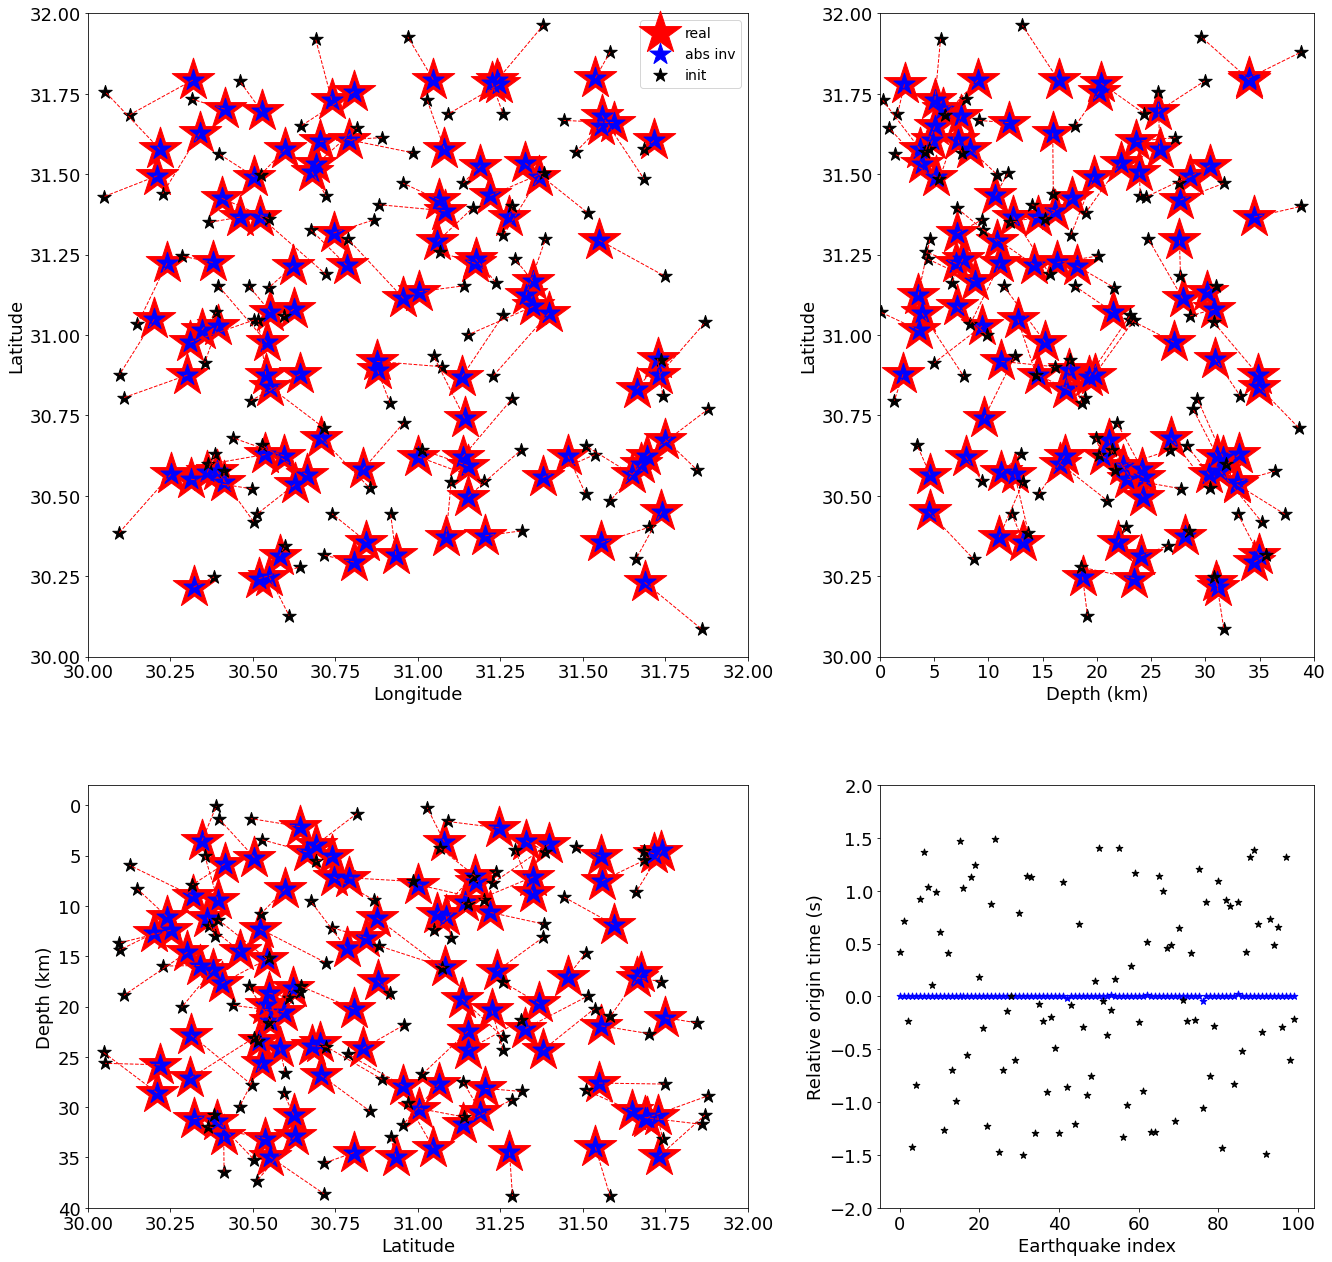

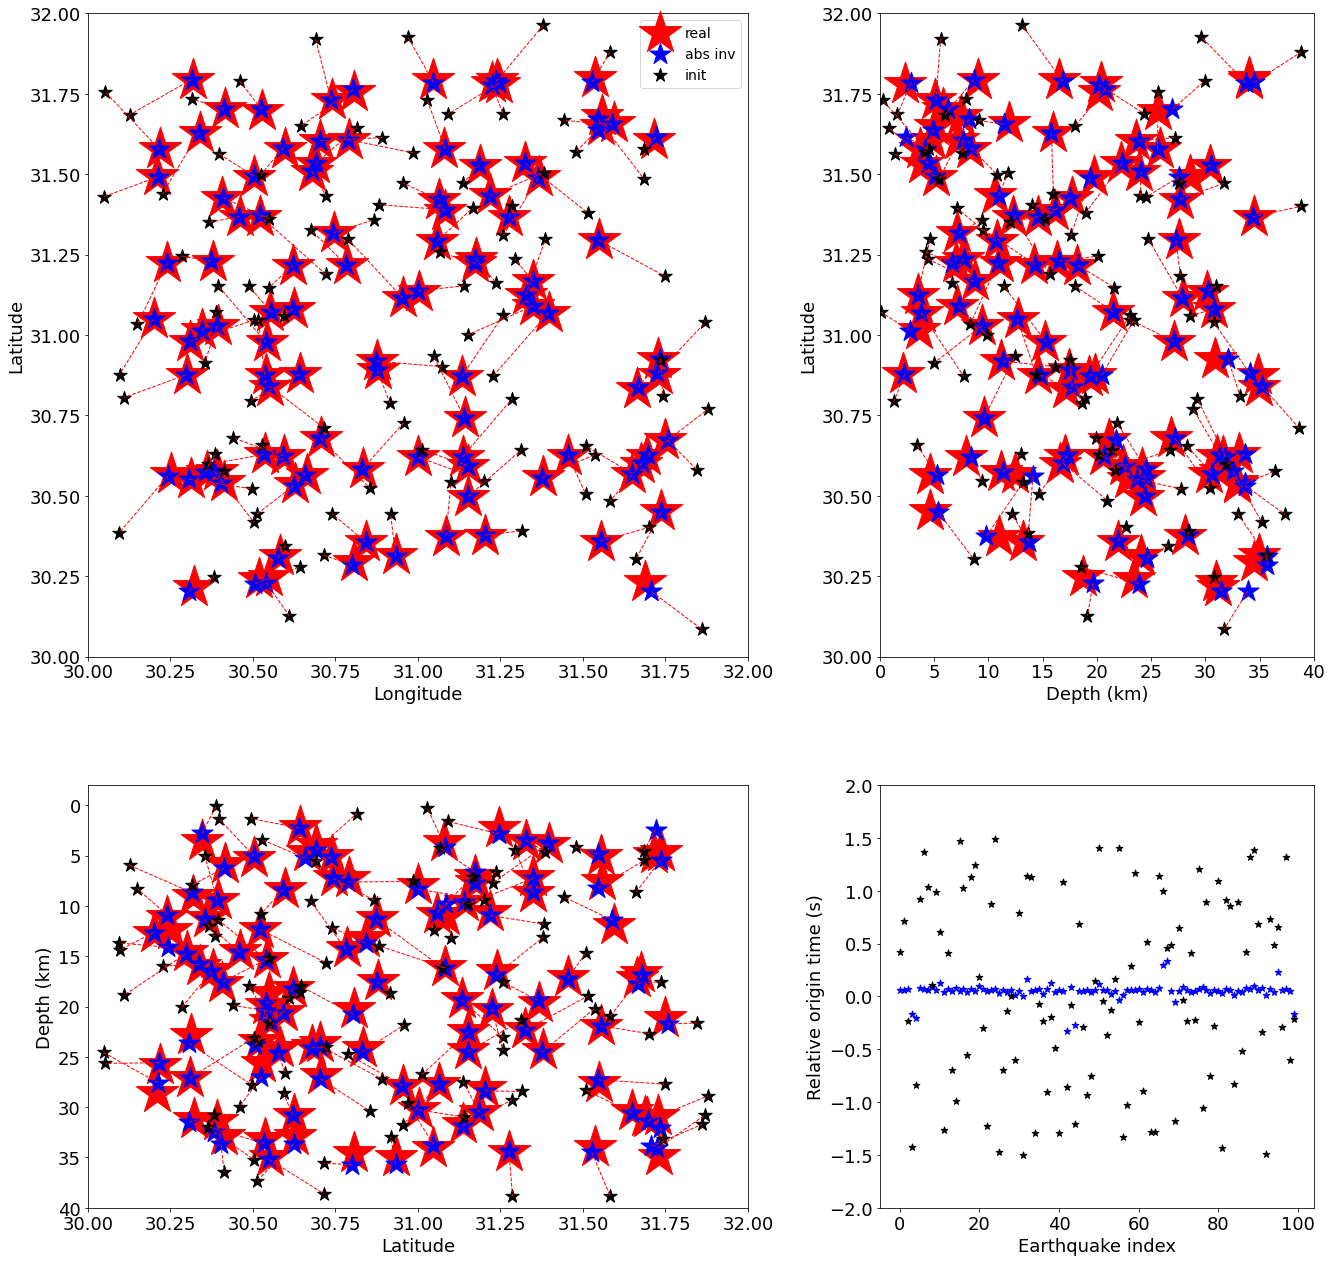

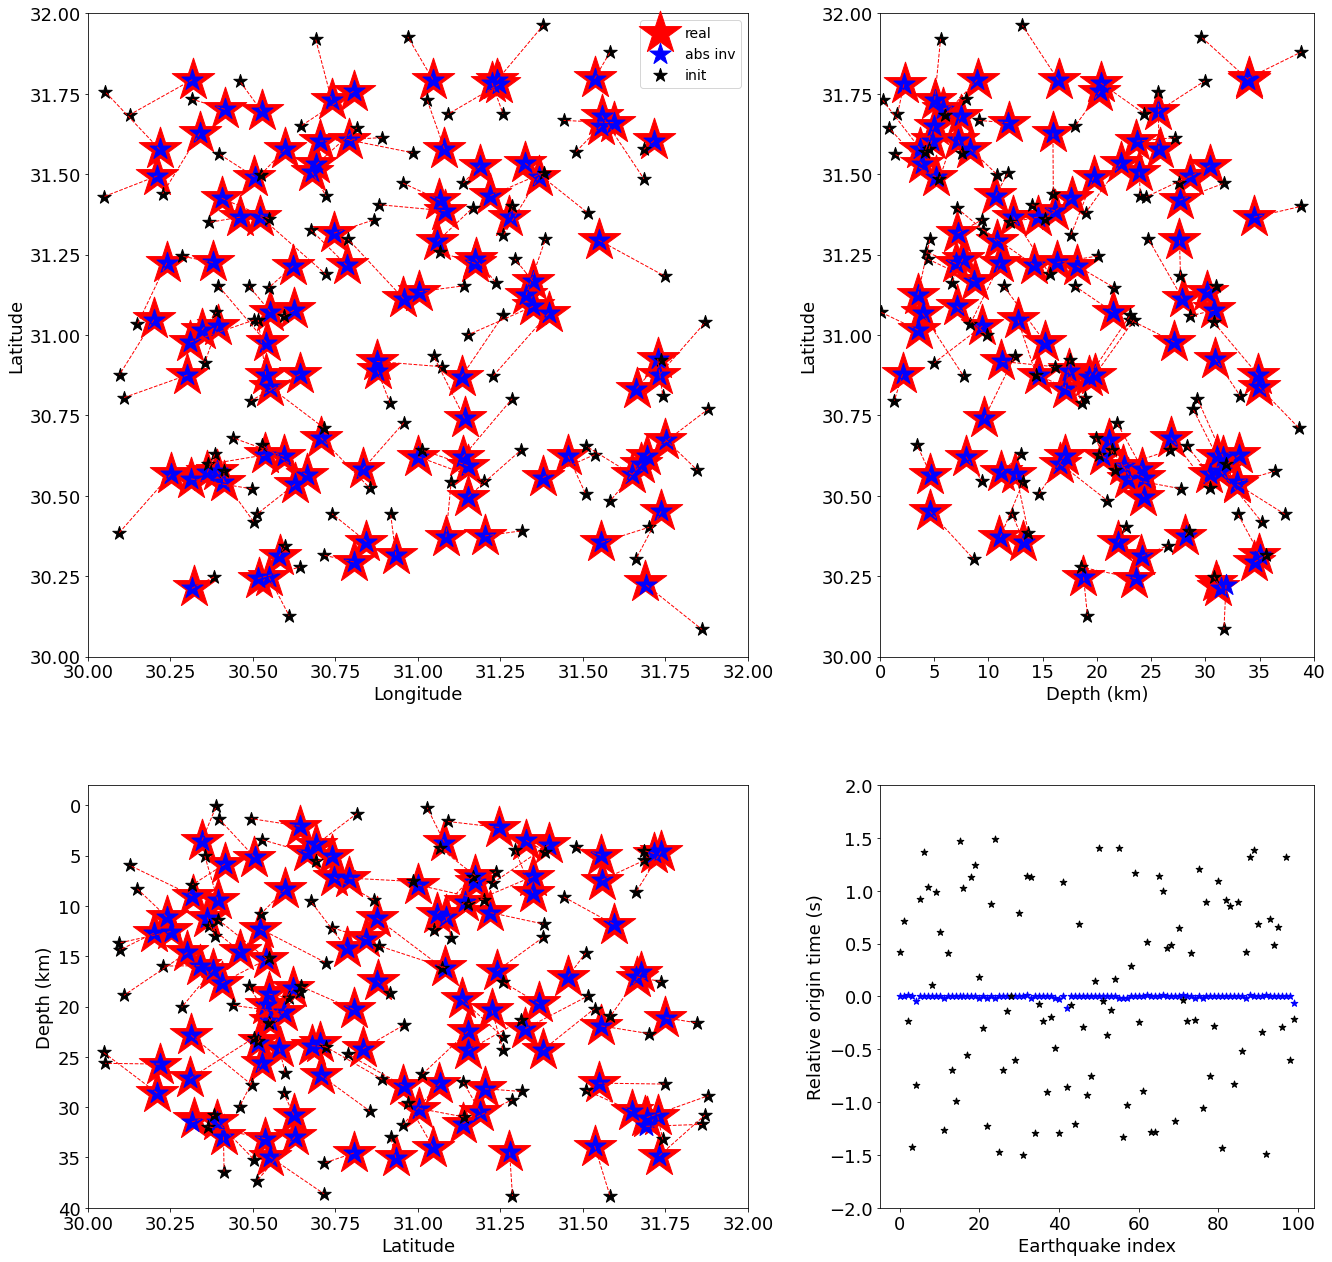

In [52]:
(ortime_cr,lat_cr,lon_cr,dep_cr) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_cr/src_rec_file_reloc_obs.dat")
(ortime_abs,lat_abs,lon_abs,dep_abs) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_abs/src_rec_file_reloc_obs.dat")
(ortime_abs_cr,lat_abs_cr,lon_abs_cr,dep_abs_cr) = get_location_ortime("OUTPUT_FILES/OUTPUT_FILES_reloc_abs_cr/src_rec_file_reloc_obs.dat")

# abs
plot_location_error("OUTPUT_FILES/OUTPUT_FILES_reloc_abs/src_rec_file_reloc_obs.dat","img/reloc_abs.jpg")

# common receiver
plot_location_error("OUTPUT_FILES/OUTPUT_FILES_reloc_cr/src_rec_file_reloc_obs.dat","img/reloc_cr.jpg")

# abs + common receiver
plot_location_error("OUTPUT_FILES/OUTPUT_FILES_reloc_abs_cr/src_rec_file_reloc_obs.dat","img/reloc_abs_cr.jpg")